## Housing Prices in Singapore

This exercise will attempt to predict resale housing prices in Singapore

In [2]:
# data 
import pandas as pd
import numpy as np

# directories
import os
#os.getcwd() #get working directory

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [3]:
# Set the relative director for training data
root_dir = "~"
train_data_dir = os.path.join(root_dir,"pythonprojects","Yidu","HW1 Data","train.csv")
test_data_dir = os.path.join(root_dir,"pythonprojects","Yidu","HW1 Data","test.csv")

# read the data frame
train_data = pd.read_csv(train_data_dir)
test_data = pd.read_csv(test_data_dir)

# Print out number of instances for each dataset
print("Training Data has {0} instances".format(len(train_data)))
print("Test Data has {0} instances".format(len(test_data)))

Training Data has 607992 instances
Test Data has 151999 instances


In [4]:
print(train_data.columns)
train_data.describe()

Index(['index', 'block', 'flat_model', 'flat_type', 'floor_area_sqm',
       'lease_commence_date', 'month', 'resale_price', 'storey_range',
       'street_name', 'town', 'latitude', 'longitude', 'postal_code', 'floor'],
      dtype='object')


,index,floor_area_sqm,lease_commence_date,resale_price,latitude,longitude,postal_code,floor
count,607992.000000,607992.000000,607992.000000,6.079920e+05,607992.000000,607992.000000,607992.000000,607992.000000
mean,303995.500000,95.542603,1986.547621,2.815431e+05,1.360492,103.838869,530443.042961,7.457277
std,175512.316769,26.191181,8.792567,1.414718e+05,0.041371,0.074209,180497.930226,4.504902
min,0.000000,28.000000,1966.000000,5.600000e+03,1.270380,103.685228,50004.000000,2.000000
25%,151997.750000,72.000000,1980.000000,1.750000e+05,1.333037,103.772579,460501.000000,5.000000
50%,303995.500000,93.000000,1985.000000,2.630000e+05,1.353276,103.842318,550140.000000,8.000000
75%,455993.250000,115.000000,1993.000000,3.688000e+05,1.379559,103.897606,650503.000000,11.000000
max,607991.000000,307.000000,2015.000000,1.180000e+06,1.457071,103.987805,825195.000000,50.000000


### Data Exploration

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607992 entries, 0 to 607991
Data columns (total 15 columns):
index                  607992 non-null int64
block                  607992 non-null object
flat_model             607992 non-null object
flat_type              607992 non-null object
floor_area_sqm         607992 non-null float64
lease_commence_date    607992 non-null int64
month                  607992 non-null object
resale_price           607992 non-null float64
storey_range           607992 non-null object
street_name            607992 non-null object
town                   607992 non-null object
latitude               607992 non-null float64
longitude              607992 non-null float64
postal_code            607992 non-null int64
floor                  607992 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 69.6+ MB


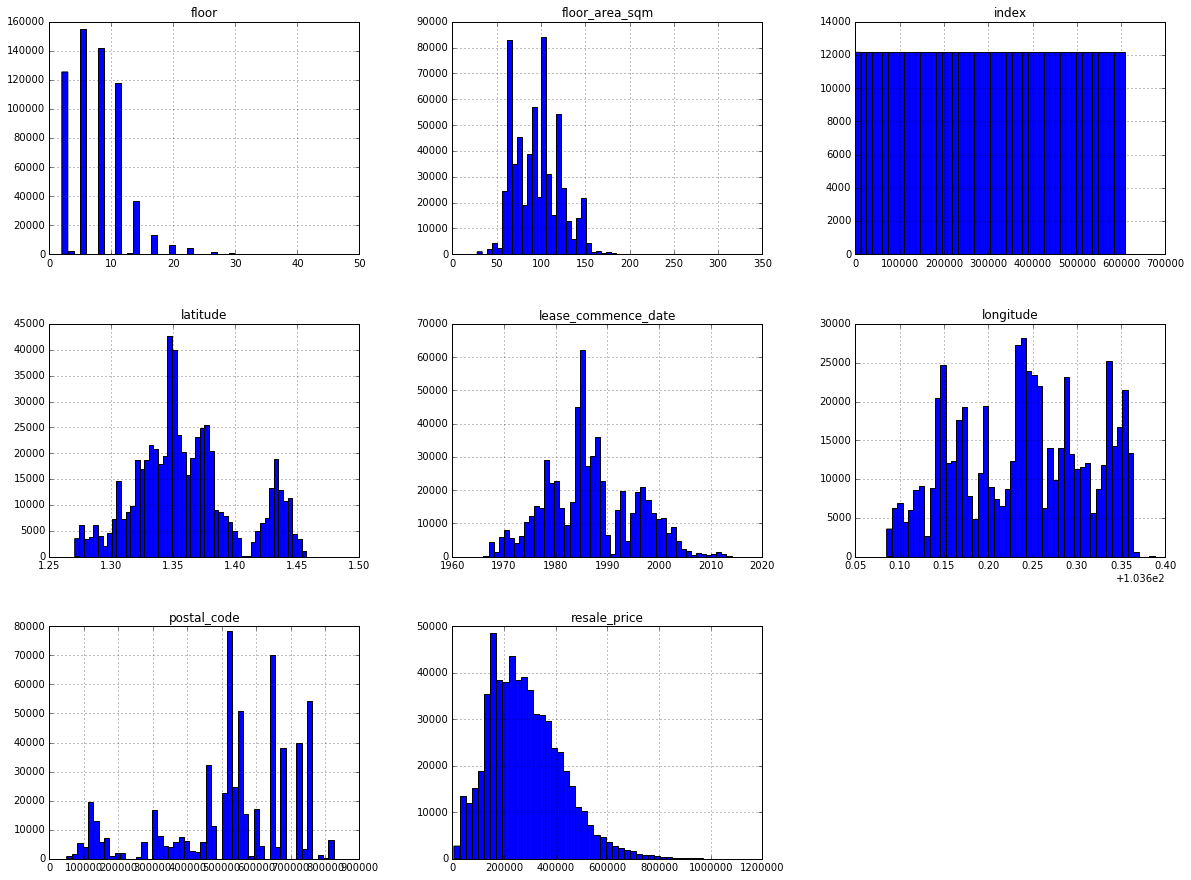

In [6]:
train_data.hist(bins=50, figsize=(20,15))
plt.show()

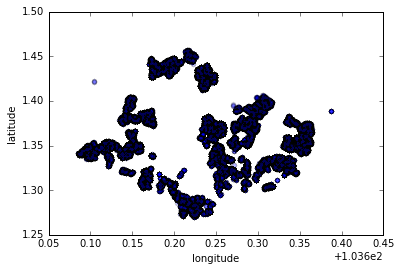

In [7]:
train_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.01)
plt.show()

In [27]:
# Splitting y_train
y_train_data = train_data.loc[:,'resale_price']
some_data = y_train_data.iloc[:5]
print(some_data)

0    312000.0
1    415000.0
2    545000.0
3      7000.0
4    278000.0
Name: resale_price, dtype: float64


In [28]:
# Getting x_train_data and x_test_data

x_train_data = train_data.loc[:, train_data.columns != 'resale_price']
x_train_data = x_train_data.loc[:, x_train_data.columns != 'index']
x_train_data.info()

x_test_data = test_data
x_test_data = x_test_data.loc[:, x_test_data.columns != 'index']
x_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607992 entries, 0 to 607991
Data columns (total 13 columns):
block                  607992 non-null object
flat_model             607992 non-null object
flat_type              607992 non-null object
floor_area_sqm         607992 non-null float64
lease_commence_date    607992 non-null int64
month                  607992 non-null object
storey_range           607992 non-null object
street_name            607992 non-null object
town                   607992 non-null object
latitude               607992 non-null float64
longitude              607992 non-null float64
postal_code            607992 non-null int64
floor                  607992 non-null int64
dtypes: float64(3), int64(3), object(7)
memory usage: 60.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151999 entries, 0 to 151998
Data columns (total 13 columns):
block                  151999 non-null object
flat_model             151999 non-null object
flat_type              15

### Data Preparation

In [29]:
x_train_data.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,storey_range,street_name,town,latitude,longitude,postal_code,floor
0,250,MODEL A,4 ROOM,105.0,1992,2001-11,04 TO 06,BISHAN ST 22,BISHAN,1.361615,103.843937,570250,5
1,166,IMPROVED,5 ROOM,121.0,1987,1996-07,10 TO 12,YISHUN RING RD,YISHUN,1.436284,103.831607,760166,11
2,306D,PREMIUM APARTMENT,4 ROOM,93.0,2012,2017-04,10 TO 12,PUNGGOL DR,PUNGGOL,1.406081,103.906438,824306,11
3,33,IMPROVED,1 ROOM,29.0,1969,1990-07,04 TO 06,TAMAN HO SWEE,BUKIT MERAH,1.288226,103.831906,161033,5
4,312,NEW GENERATION,4 ROOM,98.0,1985,2000-07,10 TO 12,SERANGOON AVE 2,SERANGOON,1.353288,103.865796,550312,11


In [30]:
# uniqueness of datasets
print("street_name: ", len(set(x_train_data['street_name'])))
print("town: ", len(set(x_train_data['town'])))
print("flat_model: ", len(set(x_train_data['flat_model'])))
print("storey_range:", len(set(x_train_data['storey_range'])))
print("floor:", len(set(x_train_data['floor'])))
print("flat model: ", len(set(x_train_data['flat_model'])))
print("postal code: ", len(set(x_train_data['postal_code'])))
print("block: ", len(set(x_train_data['block'])))

street_name:  542
town:  27
flat_model:  20
storey_range: 25
floor: 22
flat model:  20
postal code:  8742
block:  2178


In [31]:
# creating new variables
x_train_data['lease_age'] = 2018 - x_train_data['lease_commence_date']
x_test_data['lease_age'] = 2018 - x_test_data['lease_commence_date']

In [32]:
# dropping variables

# street name - TOO MANY UNIQUE POINTS, PROBLEM WITH ENCODING
x_train_data = x_train_data.loc[:, x_train_data.columns != 'street_name']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'street_name']

# floor and storey range too similar, will drop STOREY RANGE 
x_train_data = x_train_data.loc[:, x_train_data.columns != 'storey_range']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'storey_range']

# lease age > lease commence date, dropp lease commence date
x_train_data = x_train_data.loc[:, x_train_data.columns != 'lease_commence_date']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'lease_commence_date']

# dropping postal code - since we already have town
x_train_data = x_train_data.loc[:, x_train_data.columns != 'postal_code']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'postal_code']

# dropping block - too unique, probably not that important
x_train_data = x_train_data.loc[:, x_train_data.columns != 'block']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'block']

# dropping lat and long - already have town
x_train_data = x_train_data.loc[:, x_train_data.columns != 'latitude']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'latitude']

x_train_data = x_train_data.loc[:, x_train_data.columns != 'longitude']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'longitude']

# dropping month - already have lease_age
x_train_data = x_train_data.loc[:, x_train_data.columns != 'month']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'month']


In [34]:
# check before ecoding
train_data.where(train_data['resale_price']<100000).dropna()

,index,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,latitude,longitude,postal_code,floor
3,3.0,33,IMPROVED,1 ROOM,29.0,1969.0,1990-07,7000.0,04 TO 06,TAMAN HO SWEE,BUKIT MERAH,1.288226,103.831906,161033.0,5.0
9,9.0,702,NEW GENERATION,3 ROOM,67.0,1980.0,1991-01,47000.0,01 TO 03,WEST COAST RD,CLEMENTI,1.307267,103.761108,120702.0,2.0
32,32.0,9,IMPROVED,2 ROOM,55.0,1982.0,1996-09,83000.0,04 TO 06,JLN KUKOH,CENTRAL AREA,1.287674,103.838858,160009.0,5.0
42,42.0,114,NEW GENERATION,4 ROOM,98.0,1986.0,1992-04,90000.0,07 TO 09,SERANGOON NTH AVE 1,SERANGOON,1.368849,103.871491,550114.0,8.0
45,45.0,113,NEW GENERATION,4 ROOM,92.0,1978.0,1991-01,93000.0,10 TO 12,ANG MO KIO AVE 4,ANG MO KIO,1.371785,103.835966,560113.0,11.0
59,59.0,36,IMPROVED,4 ROOM,84.0,1977.0,1992-02,62000.0,07 TO 09,BEDOK STH AVE 2,BEDOK,1.321633,103.938441,460036.0,8.0
63,63.0,20,IMPROVED,3 ROOM,65.0,1978.0,1994-05,99000.0,01 TO 03,DOVER CRES,QUEENSTOWN,1.306723,103.783524,130020.0,2.0
87,87.0,275,MODEL A,3 ROOM,80.0,1985.0,1994-09,95000.0,01 TO 03,TAMPINES ST 22,TAMPINES,1.347813,103.950409,520275.0,2.0
117,117.0,122,NEW GENERATION,3 ROOM,67.0,1978.0,1991-07,46000.0,01 TO 03,ANG MO KIO AVE 3,ANG MO KIO,1.370189,103.843413,560122.0,2.0
144,144.0,1,IMPROVED,3 ROOM,65.0,1976.0,1994-12,88000.0,13 TO 15,GHIM MOH RD,QUEENSTOWN,1.312880,103.786855,270001.0,14.0


In [39]:
from datetime import datetime
month = datetime.strptime('1990-07', "%Y-%m")
print(month)
lease_commencement_date = datetime.strptime('1969',"%Y")
print(lease_commencement_date)
print(month-lease_commencement_date)

1990-07-01 00:00:00
1969-01-01 00:00:00
7851 days, 0:00:00


One Hot Encoding

In [15]:
set(x_train_data['flat_type'])

{'1 ROOM',
 '2 ROOM',
 '3 ROOM',
 '4 ROOM',
 '5 ROOM',
 'EXECUTIVE',
 'MULTI GENERATION'}

In [16]:
 def map_flat_type_bedroom(flat_type):
    if flat_type == '1 ROOM':
        no_bedroom = 0
    elif flat_type == '2 ROOM':
        no_bedroom = 1
    elif flat_type == '3 ROOM':
        no_bedroom = 2
    elif flat_type == '4 ROOM':
        no_bedroom = 3
    elif flat_type == '5 ROOM':
        no_bedroom = 3
    elif flat_type == 'EXECUTIVE':
        no_bedroom = 3
    elif flat_type == 'MULTI GENERATION':
        no_bedroom = 4
    return (no_bedroom)

 def map_flat_type_bath(flat_type):
    if flat_type == '1 ROOM':
        no_bath = 1
    elif flat_type == '2 ROOM':
        no_bath = 1
    elif flat_type == '3 ROOM':
        no_bath = 2
    elif flat_type == '4 ROOM':
        no_bath = 2
    elif flat_type == '5 ROOM':
        no_bath = 2
    elif flat_type == 'EXECUTIVE':
        no_bath = 2
    elif flat_type == 'MULTI GENERATION':
        no_bath = 3
    return (no_bath)

In [17]:
x_train_data['no_bath']=x_train_data['flat_type'].apply(map_flat_type_bath)
x_train_data['no_bedroom']=x_train_data['flat_type'].apply(map_flat_type_bedroom)

In [18]:
x_train_data.head()

,flat_model,flat_type,floor_area_sqm,town,floor,lease_age,no_bath,no_bedroom
0,MODEL A,4 ROOM,105.0,BISHAN,5,26,2,3
1,IMPROVED,5 ROOM,121.0,YISHUN,11,31,2,3
2,PREMIUM APARTMENT,4 ROOM,93.0,PUNGGOL,11,6,2,3
3,IMPROVED,1 ROOM,29.0,BUKIT MERAH,5,49,1,0
4,NEW GENERATION,4 ROOM,98.0,SERANGOON,11,33,2,3


In [19]:
#filling NA's with the median of the column:
x_train_data = x_train_data.fillna(x_train_data.median())
x_test_data = x_test_data.fillna(x_test_data.median())

In [20]:
x_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607992 entries, 0 to 607991
Data columns (total 8 columns):
flat_model        607992 non-null object
flat_type         607992 non-null object
floor_area_sqm    607992 non-null float64
town              607992 non-null object
floor             607992 non-null int64
lease_age         607992 non-null int64
no_bath           607992 non-null int64
no_bedroom        607992 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 37.1+ MB


In [21]:
# Encoding categorical variables
x_train_encoded = pd.get_dummies(x_train_data)

# Visualize
x_train_encoded.columns

Index(['floor_area_sqm', 'floor', 'lease_age', 'no_bath', 'no_bedroom',
       'flat_model_2-ROOM', 'flat_model_ADJOINED FLAT', 'flat_model_APARTMENT',
       'flat_model_DBSS', 'flat_model_IMPROVED',
       'flat_model_IMPROVED-MAISONETTE', 'flat_model_MAISONETTE',
       'flat_model_MODEL A', 'flat_model_MODEL A-MAISONETTE',
       'flat_model_MODEL A2', 'flat_model_MULTI GENERATION',
       'flat_model_NEW GENERATION', 'flat_model_PREMIUM APARTMENT',
       'flat_model_PREMIUM APARTMENT LOFT', 'flat_model_PREMIUM MAISONETTE',
       'flat_model_SIMPLIFIED', 'flat_model_STANDARD', 'flat_model_TERRACE',
       'flat_model_TYPE S1', 'flat_model_TYPE S2', 'flat_type_1 ROOM',
       'flat_type_2 ROOM', 'flat_type_3 ROOM', 'flat_type_4 ROOM',
       'flat_type_5 ROOM', 'flat_type_EXECUTIVE', 'flat_type_MULTI GENERATION',
       'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
       'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH',
       'town_CENTRAL AREA'

### Model Selection

#### Linear Regression

In [ ]:
import sklearn.linear_model
from sklearn.model_selection import cross_val_score

lin_model = sklearn.linear_model.LinearRegression()
lin_scores = cross_val_score(lin_model, x_train_encoded, y_train_data,
                         scoring="neg_mean_absolute_error", cv=3)
model1_mae_scores = (-lin_scores)
print(model1_mae_scores)

In [ ]:
some_data = x_train_encoded.iloc[:5]
print(some_data)
print(y_train_data.iloc[:5])

In [ ]:
lin_model.fit(x_train_encoded, y_train_data)
y_predict = lin_model.predict(some_data)
print(y_predict)
print(list(y_train_data.iloc[:5]))

#### SGD Regressor

In [23]:
import sklearn.linear_model
from sklearn.model_selection import cross_val_score

sgdr_model = sklearn.linear_model.SGDRegressor()
sgdr_scores = cross_val_score(sgdr_model, x_train_encoded, y_train_data,
                         scoring="neg_mean_absolute_error", cv=3)
sgdr_mae_scores = -sgdr_scores
print(sgdr_mae_scores)

/home/johngo88/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/johngo88/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/johngo88

[2.14968290e+12 6.40891785e+11 8.89758726e+11]


In [24]:
sgdr_model.fit(x_train_encoded, y_train_data)
y_predict = sgdr_model.predict(some_data)
print(y_predict)
print(list(y_train_data.iloc[:5]))

/home/johngo88/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


NameError: name 'some_data' is not defined

#### Lasso Regression

In [ ]:
lasso_model = sklearn.linear_model.Lasso()
lasso_scores = cross_val_score(lasso_model, x_train_encoded, y_train_data,
                         scoring="neg_mean_absolute_error", cv=3)
lasso_mae_scores = -lasso_scores
print(lasso_mae_scores)

In [ ]:
lasso_model.fit(x_train_encoded, y_train_data)
y_predict = lasso_model.predict(some_data)
print(y_predict)
print(list(y_train_data.iloc[:5]))

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg_scores = cross_val_score(svm_reg, x_train_encoded, y_train_data,
                         scoring="neg_mean_absolute_error", cv=3)
svm_reg_mae_scores = -lasso_scores
print(svm_reg_mae_scores)

In [ ]:
svm_reg.fit(x_train_encoded, y_train_data)
y_predict = svm_reg_model.predict(some_data)
print(y_predict)
print(list(y_train_data.iloc[:5]))